## [RQ5] 
Does being a tall player mean winning more air duels? Soccer is a physical game, and it happens often in a match that players are involved in air duels (i.e. when two players are contending for the ball while it is not on the ground). Make a plot that shows the dependency between height of the player and the ratio of air duels won with air duels attempted. The visualization should be a scatterplot, where each point (x,y) represent a player whose height is equal to x, and that has a ratio of winning air duels equal to y. Furthermore, color any point according an arbitrary selection of categories of height (e.g. yellow: 160-165cm, orange: 165-170cm, etc.)

Remember that the "Air Duel" is a subevent of the event "Duel" and that an air duel is said to be won if it has the tag "1801". Same as in RQ4, choose a threshold of minimum air duels attempted, in order filter your data, get reliable results, and justify your choice.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_json(r"events/events_England.json")

In [4]:
#selecting only air duels
eventofinterest=dataset[dataset["subEventName"]=='Air duel']
eventofinterest.reset_index(inplace=True,drop=True)
eventofinterest.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,1,Air duel,"[{'id': 701}, {'id': 1802}]",8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",2499719,Duel,1631,1H,14.765321,10,177959189
1,1,Air duel,"[{'id': 703}, {'id': 1801}]",0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",2499719,Duel,1609,1H,14.765321,10,177961218
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",2499719,Duel,1631,1H,21.878309,10,177959191
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",25413,"[{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]",2499719,Duel,1609,1H,22.551816,10,177959181
4,1,Air duel,"[{'id': 703}, {'id': 1801}]",192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",2499719,Duel,1631,1H,47.717508,10,177959210


In [5]:
# data set says that if tags 1801 then it is a successive event.
#Filtering only the data that they are equal to 1801
eventofsucessive=eventofinterest[[eventofinterest["tags"][i][1]['id'] == 1801 for i in range(eventofinterest["tags"].shape[0])]]

In [6]:
eventofsucessive.drop(["positions","matchId","teamId","matchPeriod","id"],axis=1,inplace=True)
eventofsucessive.head()

C:\Users\vedat\Anaconda3\envs\DataScience\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,eventId,subEventName,tags,playerId,eventName,eventSec,subEventId
1,1,Air duel,"[{'id': 703}, {'id': 1801}]",0,Duel,14.765321,10
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",8653,Duel,21.878309,10
4,1,Air duel,"[{'id': 703}, {'id': 1801}]",192748,Duel,47.717508,10
7,1,Air duel,"[{'id': 703}, {'id': 1801}]",120339,Duel,178.317724,10
9,1,Air duel,"[{'id': 703}, {'id': 1801}]",14763,Duel,254.036308,10


In [7]:
#groupby the players and count them
succesivecount=eventofsucessive.groupby("playerId").count()
succesivecount.drop(["subEventName","tags","eventName","eventSec","subEventId"],axis=1,inplace=True)
succesivecount.reset_index(inplace=True)
succesivecount.head()


,playerId,eventId
0,0,1129
1,36,27
2,38,12
3,48,152
4,54,22


In [8]:
teamdata=pd.read_json("players.json")
teamdata=teamdata[["firstName","middleName","lastName","height","wyId"]]
teamdata.head()


,firstName,middleName,lastName,height,wyId
0,Harun,,Tekin,187,32777
1,Malang,,Sarr,182,393228
2,Over,,Mandanda,176,393230
3,Alfred John Momar,,N'Diaye,187,32793
4,Ibrahima,,Konat\u00e9,192,393247


In [11]:
#to finding player name merge them on player Id
lastdata=succesivecount.merge(teamdata,left_on="playerId",right_on="wyId")
lastdata.drop("wyId",axis=1,inplace=True)
lastdata.head()

,playerId,eventId,firstName,middleName,lastName,height
0,36,27,Toby,,Alderweireld,187
1,38,12,Daley,,Blind,180
2,48,152,Jan,,Vertonghen,189
3,54,22,Christian,,Dannemann Eriksen,180
4,56,3,Davy,,Klaassen,179


In [12]:
#total number of passes that each player done 
eventoftotal=eventofinterest.groupby("playerId").count()
eventoftotal.reset_index(inplace=True)
eventoftotal=eventoftotal[["playerId","eventId"]]
eventoftotal.rename(columns={"eventId":"totalduel"},inplace=True)
eventoftotal.head()

,playerId,totalduel
0,0,2972
1,36,55
2,38,19
3,48,213
4,54,52


In [13]:
#merging both succesive duels and totalduels on player id
lastdata=lastdata.merge(eventoftotal,left_on="playerId",right_on="playerId")
lastdata.rename(columns={"eventId":"succesiveduel"},inplace=True)
lastdata.head()

,playerId,succesiveduel,firstName,middleName,lastName,height,totalduel
0,36,27,Toby,,Alderweireld,187,55
1,38,12,Daley,,Blind,180,19
2,48,152,Jan,,Vertonghen,189,213
3,54,22,Christian,,Dannemann Eriksen,180,52
4,56,3,Davy,,Klaassen,179,8


In [14]:
#calculating ratio between successive and all air duel
lastdata["ratio"]=lastdata["succesiveduel"]/lastdata["totalduel"]

In [16]:
#if total duel less then 50 , find their mean and remove their standart deviation to filter ratio
lastdata=lastdata.sort_values(by="totalduel").reset_index(drop=True)
lastdata=lastdata[lastdata["totalduel"]>=
         lastdata[lastdata["totalduel"]>=50]["totalduel"].mean()-(lastdata[lastdata["totalduel"]>=50]["totalduel"].std())/2]

In [17]:
lastdata=lastdata.sort_values(by="ratio",ascending=False).reset_index(drop=True)
lastdata.head()

,playerId,succesiveduel,firstName,middleName,lastName,height,totalduel,ratio
0,135103,76,Andreas,,Christensen,188,96,0.791667
1,7887,106,Gary,,Cahill,193,134,0.791045
2,25854,132,Kurt Happy,,Zouma,190,170,0.776471
3,8242,253,Shane,,Duffy,193,337,0.750742
4,7922,143,Chris,,Smalling,193,192,0.744792


Text(0.5, 1.0, 'Height-Succes Ratio')

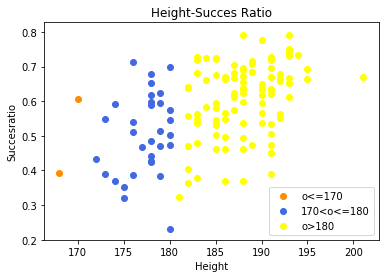

In [48]:
# plt.figure(figsize=(10,7))
colormap=np.array(["r","g","b"])
categories=np.array(list(range(lastdata.shape[0])))
plt.scatter(lastdata[lastdata["height"]<=170].height,
            lastdata[lastdata["height"]<=170].ratio,color="darkorange",label="o<=170")
plt.scatter(lastdata[(lastdata["height"]<=180)&(lastdata["height"]>170)].height,
            lastdata[(lastdata["height"]<=180)&(lastdata["height"]>170)].ratio,color="royalblue",
            label="170<o<=180")
plt.scatter(lastdata[lastdata["height"]>180].height,
            lastdata[lastdata["height"]>180].ratio,color="yellow",label="o>180")
plt.legend()
plt.xlabel("Height")
plt.ylabel("Succesratio")
plt.title("Height-Succes Ratio")